In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import requests
import sys
sys.path.append("../")
from config import weather_api_key
from datetime import datetime
import time
from datetime import datetime

In [3]:
from citipy import citipy

In [4]:
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
latitude = np.random.uniform(-90.0,90.0, size = 1500)

In [6]:
longitude = np.random.uniform(-180.0,180.0, size = 1500)

In [7]:
latitude

array([ 22.76966003,  11.76515424,  23.30726641, ..., -64.3918124 ,
       -10.44075699, -21.55437986])

In [8]:
longitude

array([ -53.26719622,  -67.55947288,   59.33026253, ...,  155.65443795,
       -144.98367317,  177.81659382])

In [9]:
lat_long = zip(latitude,longitude)

In [10]:
lat_long

In [11]:
coordinates = list(lat_long)

In [12]:
coordinates

[(22.769660027601063, -53.26719621968087),
 (11.765154235956189, -67.55947287978216),
 (23.307266413580834, 59.33026253454878),
 (17.36336529958568, 48.02155703583131),
 (-12.424364750611318, -58.23326800778881),
 (15.936657823637347, -58.988954816479676),
 (33.39994771529432, 86.70360577271703),
 (-89.41894291143137, -7.151400099367947),
 (-43.95450398591186, 154.34697491036712),
 (-23.824237064804848, 80.6464496709309),
 (60.98616318937286, 167.446133524326),
 (-79.70482747091518, -23.31001471775022),
 (42.683940311554835, -147.58857290013015),
 (4.604359400166857, 122.14796524230735),
 (72.84126531923366, -126.95322884072765),
 (58.39528294827733, -173.46446721690262),
 (29.084066094976322, 120.82902260651122),
 (83.96414492465493, 100.39000157744886),
 (26.06151598123509, 131.50884197127374),
 (-51.598052920638274, 57.349393758194026),
 (61.20521141933747, -15.231778473443057),
 (-23.050505520323327, -171.7800161526763),
 (39.20357778331871, -137.98258270182842),
 (45.3006654270874

In [13]:
city = citipy.nearest_city(22.99,120.21)

In [14]:
city

In [15]:
city.city_name

'tainan'

In [16]:
city.country_code

'tw'

In [17]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
         citipy.nearest_city(coordinate[0],coordinate[1]).country_code)

codrington ag
kralendijk an
qurayyat om
najran sa
vilhena br
saint-francois gp
lasa cn
hermanus za
hobart au
grand river south east mu
tilichiki ru
ushuaia ar
kodiak us
tabialan ph
tuktoyaktuk ca
provideniya ru
linhai cn
khatanga ru
naze jp
taolanaro mg
hofn is
vaini to
fortuna us
komsomolskiy ru
xinqing cn
ushuaia ar
berdigestyakh ru
nanortalik gl
butaritari ki
dikson ru
muros es
hithadhoo mv
chagda ru
sehithwa bw
attawapiskat ca
upernavik gl
palabuhanratu id
parras mx
albany au
zonguldak tr
husavik is
mataura pf
leningradskiy ru
vuktyl ru
port-cartier ca
keti bandar pk
bluff nz
aktash ru
ensley us
mataura pf
mataura pf
panacan ph
kardla ee
torbat-e jam ir
port elizabeth za
vaini to
geraldton au
svetlogorsk ru
srivardhan in
noumea nc
klaksvik fo
airai pw
surgut ru
ribeira grande pt
kilindoni tz
auki sb
katherine au
kapaa us
punta arenas cl
pascagoula us
avanigadda in
bethel us
cidreira br
hilo us
bambanglipuro id
poroshkovo ua
general roca ar
yellowknife ca
nikolskoye ru
bredasdorp za

atuona pf
sinnamary gf
jacareacanga br
hermanus za
tuktoyaktuk ca
soskovo ru
lashio mm
nouadhibou mr
coolum beach au
bethel us
mar del plata ar
bredasdorp za
pacific grove us
tignere cm
saskylakh ru
rodeo mx
bredasdorp za
coahuayana mx
saint-philippe re
jamestown sh
mataura pf
ushuaia ar
taolanaro mg
rikitea pf
bluff nz
alofi nu
kavaratti in
kodiak us
dwarka in
cabo san lucas mx
lebu cl
barrow us
anadyr ru
busselton au
rikitea pf
solnechnyy ru
vaini to
rikitea pf
hobart au
east london za
batagay-alyta ru
port elizabeth za
bluff nz
nigde tr
wynyard ca
kalanaur in
honiara sb
port alfred za
zambezi zm
cape town za
tumannyy ru
ruatoria nz
arraial do cabo br
rikitea pf
fairbanks us
cockburn town bs
rikitea pf
guerrero negro mx
jinchang cn
winnemucca us
constitucion mx
esperance au
salalah om
kapaa us
saskylakh ru
osakarovka kz
lady frere za
arraial do cabo br
kysyl-syr ru
rikitea pf
cape town za
sao jose da coroa grande br
provideniya ru
korla cn
albany au
rikitea pf
ascension mx
steamboat 

In [18]:
cities = []

In [19]:
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city not in cities:
        cities.append(city)

In [20]:
len(cities)

630

In [21]:
city_data = []

In [22]:
print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [23]:
for i,city in enumerate(cities):
    if(i%50 == 0 and i >= 50):
        record_count=1
        set_count+=1
        time.sleep(60)
    city_url = url + "&q=" + city.replace(" ","+")
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count+=1
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | kralendijk
Processing Record 3 of Set 1 | qurayyat
Processing Record 4 of Set 1 | najran
Processing Record 5 of Set 1 | vilhena
Processing Record 6 of Set 1 | saint-francois
Processing Record 7 of Set 1 | lasa
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 11 of Set 1 | tilichiki
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | tabialan
City not found. Skipping...
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | linhai
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | naze
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | hofn
Processing Record 22 of Set 1 | vaini
Processing Recor

Processing Record 40 of Set 4 | yenagoa
Processing Record 41 of Set 4 | klichka
Processing Record 42 of Set 4 | tuatapere
Processing Record 43 of Set 4 | toyooka
Processing Record 44 of Set 4 | hornepayne
Processing Record 45 of Set 4 | belmonte
Processing Record 46 of Set 4 | karpathos
Processing Record 47 of Set 4 | guerrero negro
Processing Record 48 of Set 4 | liverpool
Processing Record 49 of Set 4 | cancun
Processing Record 50 of Set 4 | north bend
Processing Record 1 of Set 5 | wuan
Processing Record 2 of Set 5 | sechura
Processing Record 3 of Set 5 | marietta
Processing Record 4 of Set 5 | bandarbeyla
Processing Record 5 of Set 5 | vetlanda
Processing Record 6 of Set 5 | hasaki
Processing Record 7 of Set 5 | kangavar
Processing Record 8 of Set 5 | narrabri
Processing Record 9 of Set 5 | darhan
Processing Record 10 of Set 5 | almaznyy
Processing Record 11 of Set 5 | abu road
Processing Record 12 of Set 5 | narovchat
Processing Record 13 of Set 5 | black forest
Processing Record 

Processing Record 33 of Set 8 | russell
Processing Record 34 of Set 8 | truro
Processing Record 35 of Set 8 | virginia beach
Processing Record 36 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 37 of Set 8 | makung
City not found. Skipping...
Processing Record 38 of Set 8 | skjervoy
Processing Record 39 of Set 8 | wajir
Processing Record 40 of Set 8 | saint-augustin
Processing Record 41 of Set 8 | vila velha
Processing Record 42 of Set 8 | soledade
Processing Record 43 of Set 8 | padang
Processing Record 44 of Set 8 | viligili
City not found. Skipping...
Processing Record 45 of Set 8 | murray bridge
Processing Record 46 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 47 of Set 8 | pochutla
Processing Record 48 of Set 8 | kamenka
Processing Record 49 of Set 8 | sofiysk
City not found. Skipping...
Processing Record 50 of Set 8 | brae
Processing Record 1 of Set 9 | jacareacanga
Processing Record 2 of Set 9 | soskovo
Processing Record 3 of Set 9 | las

Processing Record 20 of Set 12 | nyurba
Processing Record 21 of Set 12 | turukhansk
Processing Record 22 of Set 12 | tidore
City not found. Skipping...
Processing Record 23 of Set 12 | vila franca do campo
Processing Record 24 of Set 12 | okhotsk
Processing Record 25 of Set 12 | bereda
Processing Record 26 of Set 12 | madinat sittah uktubar
Processing Record 27 of Set 12 | chapais
Processing Record 28 of Set 12 | ostrovnoy
Processing Record 29 of Set 12 | sorong
Processing Record 30 of Set 12 | riyadh
Processing Record 31 of Set 12 | laguna
Processing Record 32 of Set 12 | hami
Processing Record 33 of Set 12 | shalya
Processing Record 34 of Set 12 | san patricio
Processing Record 35 of Set 12 | richards bay
Processing Record 36 of Set 12 | quelimane
Processing Record 37 of Set 12 | chau doc
Processing Record 38 of Set 12 | pasni
Processing Record 39 of Set 12 | abtenau
Processing Record 40 of Set 12 | monrovia
Processing Record 41 of Set 12 | oxbow
Processing Record 42 of Set 12 | ahip

In [24]:
citydata_df = pd.DataFrame(city_data)
citydata_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Codrington,-38.2667,141.9667,56.95,68,41,8.55,AU,2022-10-16 01:33:35
1,Kralendijk,12.1500,-68.2667,82.38,78,20,11.50,BQ,2022-10-16 01:33:35
2,Qurayyat,31.3318,37.3428,62.78,48,0,4.61,SA,2022-10-16 01:33:36
3,Najran,17.4924,44.1277,63.25,27,100,2.35,SA,2022-10-16 01:33:36
4,Vilhena,-12.7406,-60.1458,69.69,87,98,3.36,BR,2022-10-16 01:30:54
5,Saint-Francois,46.4154,3.9054,56.68,100,0,0.00,FR,2022-10-16 01:33:36
6,Lasa,46.6166,10.7002,58.08,94,97,2.59,IT,2022-10-16 01:33:37
7,Hermanus,-34.4187,19.2345,61.81,90,60,10.85,ZA,2022-10-16 01:33:37
8,Hobart,-42.8794,147.3294,56.26,64,75,10.36,AU,2022-10-16 01:33:37
9,Tilichiki,60.4667,166.1000,32.25,93,100,7.18,RU,2022-10-16 01:33:37


In [25]:
new_col = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [26]:
citydata_df = citydata_df[new_col]

In [27]:
citydata_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Codrington,AU,2022-10-16 01:33:35,-38.2667,141.9667,56.95,68,41,8.55
1,Kralendijk,BQ,2022-10-16 01:33:35,12.1500,-68.2667,82.38,78,20,11.50
2,Qurayyat,SA,2022-10-16 01:33:36,31.3318,37.3428,62.78,48,0,4.61
3,Najran,SA,2022-10-16 01:33:36,17.4924,44.1277,63.25,27,100,2.35
4,Vilhena,BR,2022-10-16 01:30:54,-12.7406,-60.1458,69.69,87,98,3.36
5,Saint-Francois,FR,2022-10-16 01:33:36,46.4154,3.9054,56.68,100,0,0.00
6,Lasa,IT,2022-10-16 01:33:37,46.6166,10.7002,58.08,94,97,2.59
7,Hermanus,ZA,2022-10-16 01:33:37,-34.4187,19.2345,61.81,90,60,10.85
8,Hobart,AU,2022-10-16 01:33:37,-42.8794,147.3294,56.26,64,75,10.36
9,Tilichiki,RU,2022-10-16 01:33:37,60.4667,166.1000,32.25,93,100,7.18


In [28]:
output_file = "Data/Cityinfo.csv"
citydata_df.to_csv(output_file,index_label = "City ID")

In [29]:
#Benny

In [32]:
lats = citydata_df["Lat"]

In [34]:
max_temps = citydata_df["Max Temp"]
humidity = citydata_df["Humidity"]
cloudiness = citydata_df["Cloudiness"]
wind_spds = citydata_df["Wind Speed"]

In [35]:
today = time.time()
today

1665885722.8283303

In [36]:
today = time.strftime("%x")
today

'10/15/22'

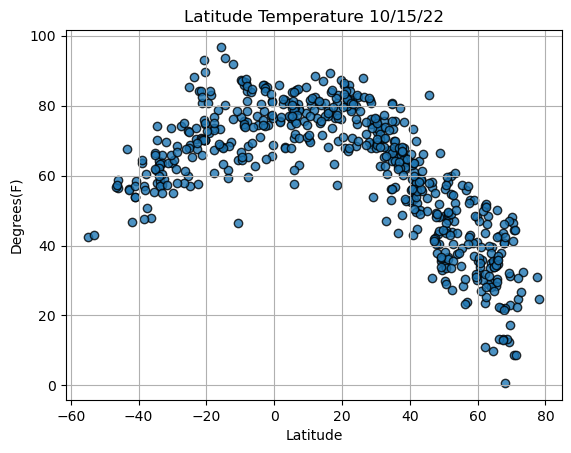

In [38]:
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title(f"Latitude Temperature " + today)
plt.ylabel("Degrees(F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Data/Lat_Temp_Scatter_Plot.png")
plt.show()

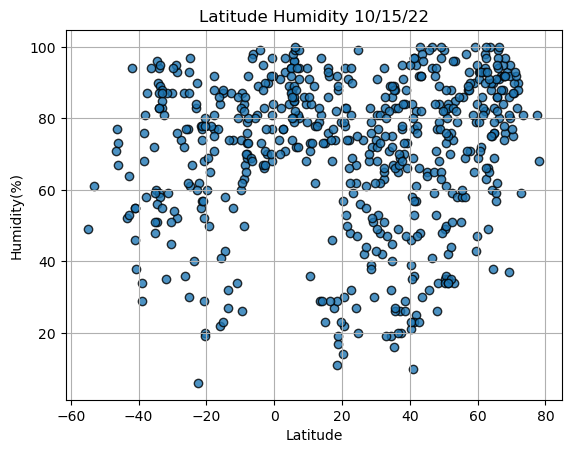

In [39]:
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title(f"Latitude Humidity " + today)
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Data/Lat_Humidity_Scatter_Plot.png")
plt.show()

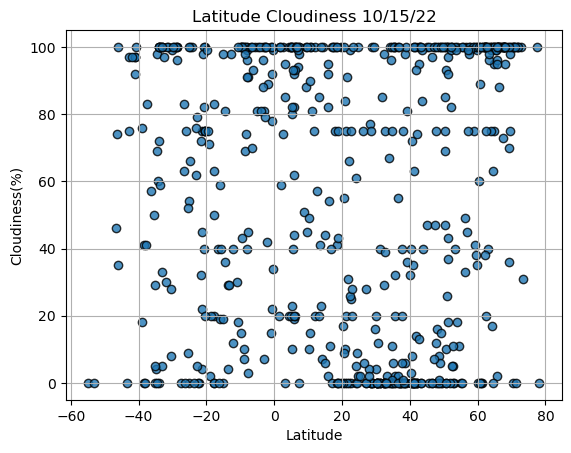

In [40]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title(f"Latitude Cloudiness " + today)
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Data/Lat_Cloudiness_Scatter_Plot.png")
plt.show()

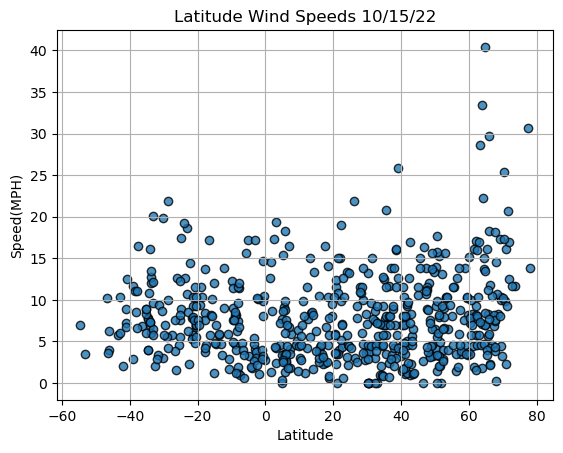

In [41]:
plt.scatter(lats, wind_spds, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title(f"Latitude Wind Speeds " + today)
plt.ylabel("Speed(MPH)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Data/Lat_Wind_Spds_Scatter_Plot.png")
plt.show()